# 1 - Introduction

Name : Hillidatul Ilmi

Batch : 12

Quoted from springboard.com, the Data Scientist workflow spends a lot of time in the process of collecting, cleaning, and tidying up data, because data will never be clean. Prior to modeling, data science must first collect and analyze data, gather actionable ideas, and share the information obtained. The stages to obtain information from the data will be explained in this milestone through data visualization and statistical analysis.

# 2 - Data Recognition and Problem Identification

Statistics is a science that deals with data. Statistics are the data itself, the information, or the result of applying statistical algorithms to the data. From the data set, statistics can be used to conclude or describe the data. The data used by this milestone is sourced from https://console.cloud.google.com/bigquery?project=bigquery-public-data&page=project regarding all transactions that occur in the look store.

Data visualization and statistical analysis use different data but are still transaction data that occurs in the online store "The Look".

The data used for visualization is an inventory item. Inventory goods are all goods owned/controlled by the regional government and goods that are handed over for use to other parties, both movable and immovable and are goods whose use is more than one year and the value can be determined by the regional head and recorded and registered in the regional head. inventory book. The following are the transaction columns for investment goods that occur at the online store 'The Look':
- created_at : Stairs and time of occurrence of inventory transactions recorded by users
- age : Age or age of the customer who made the purchase of inventory items recorded by users
- gender : The gender of the customer who made the purchase of inventory items recorded by users
- country : Countries that shop for inventory bars online at the look store
- cost : The cost of capital used to purchase inventory items at the look store
- product_category : Categories of inventory items sold by the look store
- product_retail_price : Prices of investment goods sold by the look shop

The data used for statistical analysis is data on products and goods ordered in the online shop the look. William J. A product is a set of tangible or intangible attributes that the buyer accepts as being capable of satisfying his or her needs or needs. While the order is an order made by the system or humans. The following are the column for product transactions that occur at the online store 'The Look':
- created_at : Stairs and times of transactions for products in the shop the look
- sale_price : Discounts on product prices at the look shop
- name : The name of the product that has been sold in the look shop
- cost : The cost of capital used to purchase products at the look shop
- category : The category of products sold by the look shop
- retail_price : Prices of products sold by the look store

There has been a problem with the look shop. The CEO of the online store "The Look" suspects that there is something wrong with the sales system in his shop, in terms of product sales performance, delivery of goods, etc. Please help reveal whether or not there is a problem with the sales system on the platform. Use thelook_ecommerce dataset on Google Cloud Platform BigQuery. Based on the problems that occur, data scientists will solve the following problems:

a. Which country has the largest average inventory purchase transaction ?

b. How does the cost of capital compare with the selling price of inventory items ?

c. What is the number of comparisons of sales of inventory items in each category of goods ?

d. Is the price of an inventory item determined by the age of the customer ?

e. Based on the size of the spread, what are the values ​​of the range, variance and standard deviation of the selected product category without any outlier data ?

f. Has the product discount at the look store increased significantly ?

g. How is the average difference in product sales for the underware category with sochs & hosiery ?

# 3 - Loading & Querying Data

Data loading is used as a process of reloading existing data for a new purpose, in the form of presenting information. Data visualization and statistical analysis using different data but still transaction data that occurs at the online store "The Look".
- Data visualization using the User data table and the inventory_items table, which displays the create_at, gender, country, cost, product_category and product_retail_price columns.
- Statistical analysis using order_items and products table data, which displays create_at, sale_price, name, cost, category and retail_price columns.

Here are all the queries made to pull all the required data in this milestone:

## 3a - Data loading and queries for visualization

`SELECT` #Display the required number of columns from a table

`inventory.created_at,users.age,users.gender,users.country`, #Want to display the gender and country columns from the users table

`inventory.cost,inventory.product_category,inventory.product_retail_price` #Want to display the created_at, cost, product_category and product_retail_price columns from the inventory table

`FROM 'bigquery-public-data.thelook_ecommerce.users' AS users` #Required data from thelook_ecommerce defined as users table

`JOIN 'bigquery-public-data.thelook_ecommerce.inventory_items' AS inventory` #Combined with the inner join method of thelook_ecommerce defined as inventory table

`ON users.id = inventory.id;` #Merge both tables into one piece

In [ ]:
# Library to retrieve data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display ecommerce table data for data visualization
ecommerce = pd.read_csv('https://raw.githubusercontent.com/HillidatulIlmi/Dataset/main/user%20%26%20inventory_Items.csv')
ecommerce

,created_at,age,gender,country,cost,product_category,product_retail_price
0,2021-07-13 13:48:37 UTC,56,M,China,13.925,Tops & Tees,25.0
1,2021-08-26 05:08:00 UTC,26,F,United States,13.925,Tops & Tees,25.0
2,2022-04-04 06:22:56 UTC,30,M,Germany,13.925,Tops & Tees,25.0
3,2020-03-15 09:37:00 UTC,17,F,Brasil,13.925,Tops & Tees,25.0
4,2020-11-23 14:49:00 UTC,68,F,United States,13.925,Tops & Tees,25.0
...,...,...,...,...,...,...,...
99995,2021-03-15 01:05:00 UTC,32,M,China,14.751,Active,33.0
99996,2022-04-02 03:07:20 UTC,68,F,United Kingdom,14.751,Active,33.0
99997,2021-09-27 04:34:00 UTC,50,M,United States,14.751,Active,33.0
99998,2022-02-26 20:13:15 UTC,70,F,Spain,10.465,Maternity,23.0


In [ ]:
ecommerce.shape

(100000, 7)

**Data Type**. From the data above, there are 100000 samples of observations with 7 columns taken from inventory transactions that occur at the look shop. The column information is self-explanatory from the name of each column.

1. Qualitative data in this table are created_at, gender, country and product_category.
2. The quantitative data in this table are age, cost and product_retail_price.

## 3b - Data loading and queries for statistics analysis


`SELECT` #Display the required number of columns from a table

`order_items.created_at,order_items.sale_price`, #Want to display the reated_at and sale_price columns from the order_items table

`products.name,products.cost,products.category,products.retail_price `#Want to display the name, cost, category and retail_price columns from the products table

`FROM 'bigquery-public-data.thelook_ecommerce.order_items' AS order_items` #Required data from thelook_ecommerce defined as order_items table

`JOIN 'bigquery-public-data.thelook_ecommerce.products AS products` #Joined by the inner join method of thelook_ecommerce defined as the products table

`ON order_items.id = products.id`; #Merge both tables into one piece

In [ ]:
# Library to retrieve data
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display the look table data for statistical analysis
TheLook = pd.read_csv('https://raw.githubusercontent.com/HillidatulIlmi/Dataset/main/orderitems%20%26%20product.csv')
TheLook 

,created_at,sale_price,name,cost,category,retail_price
0,2020-11-14 13:30:35 UTC,16.190001,2XU Men's Swimmers Compression Long Sleeve Top,92.652563,Swim,150.410004
1,2021-07-25 22:36:14 UTC,76.000000,TYR Sport Men's Square Leg Short Swim Suit,24.719661,Swim,38.990002
2,2022-06-01 23:14:25 UTC,62.360001,TYR Sport Men's Solid Durafast Jammer Swim Suit,15.897600,Swim,27.600000
3,2020-11-19 03:43:03 UTC,45.349998,TYR Sport Men's Swim Short/Resistance Short Sw...,17.850000,Swim,30.000000
4,2022-01-04 00:59:14 UTC,32.990002,TYR Alliance Team Splice Jammer,29.408001,Swim,45.950001
...,...,...,...,...,...,...
29115,2021-07-23 00:25:30 UTC,27.000000,Comfort Colors C1598 Womens Full-Zip Hooded Fl...,22.150999,Fashion Hoodies & Sweatshirts,52.119999
29116,2022-03-20 00:20:44 UTC,126.629997,Comfort Colors Pigment-Dyed Ladies Full-Zip Ho...,18.973360,Fashion Hoodies & Sweatshirts,39.860001
29117,2022-05-31 11:44:13 UTC,35.770000,Comfort Colors by Chouinard Women's Drawstring...,9.028020,Fashion Hoodies & Sweatshirts,18.020000
29118,2022-01-06 16:04:29 UTC,89.779999,DV by Dolce Vita Women's Larisa Hooded Sweatshirt,17.674240,Fashion Hoodies & Sweatshirts,34.520000


In [ ]:
TheLook.shape

(29120, 6)

**Data Type**. From the data above, there are 29120 samples of observations with 6 columns taken from product transactions that occur at the look shop. The column information is self-explanatory from the name of each column.

1. Qualitative data in this table is created_at, name and category.
2. The quantitative data in this table are sale_price, cost, and retail_price.

# 4 - Data Cleaning

Data cleaning is the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or incorrectly formatted. This data is usually not necessary or helpful in analyzing the data as it can hinder the process or give inaccurate results. There are several methods for clearing data depending on how it is stored and the answer you are looking for. In this process, we will check the missing value data with .info() first:

In [ ]:
# Checking missing values for data visualization
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            100000 non-null  object 
 1   age                   100000 non-null  int64  
 2   gender                100000 non-null  object 
 3   country               100000 non-null  object 
 4   cost                  100000 non-null  float64
 5   product_category      100000 non-null  object 
 6   product_retail_price  100000 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.3+ MB


The results of the analysis of data cleaning or standard missing values in each column are obtained, based on the .info process used to see the specifications of each standard column dataset having a non-null value of 100000 which is equal to data entry of 100000.

In [ ]:
ecommerce['created_at'].min()

'2018-11-14 10:06:41 UTC'

In [ ]:
ecommerce['created_at'].max()

'2022-06-11 13:49:37.673682 UTC'

The time range for taking inventory transactions at The Look online store is from 2018-11-14 10:06:41 UTC to 2022-06-11 13:49:37 UTC. Based on this time span, sales transactions at the look shop have always sold inventory items every day, it is expected to maintain consistency in sales in order to get a profit.

In [ ]:
# Checking missing values for statistical analysis
TheLook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created_at    29120 non-null  object 
 1   sale_price    29120 non-null  float64
 2   name          29118 non-null  object 
 3   cost          29120 non-null  float64
 4   category      29120 non-null  object 
 5   retail_price  29120 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.3+ MB


The results of the analysis of data cleaning or standard missing values in each column are obtained, based on the .info process used to see the specifications of each standard column dataset having a non-null value of 29120 which is the same as data entry of 29120.

In [ ]:
TheLook['created_at'].min()

'2019-01-12 11:23:41 UTC'

In [ ]:
TheLook['created_at'].max()

'2022-06-12 13:37:17.619829 UTC'

The time range for collecting inventory transactions at The Look online store is from 2019-01-12 11:23:41 UTC to 2022-06-12 13:37:17 UTC. Based on this time span, sales transactions at the look shop have always sold products every day, it is expected to maintain consistency in sales in order to get a profit.

Missing value or cleaning, usually done by replacing missing values. Compared to delete/Drop, replacing missing values is a better choice because there is no wasted data. But of course the column data becomes less accurate because it is filled with estimated values. Based on the results of data cleaning or checking of standard missing values in both tables, it is obtained, based on the .info process which is used to view the specifications of each table with the standard column dataset having the same non-null value as the data entry. So that the data table can be used for the stage of data visualization and statistical analysis.

# 5 - Data Visualization and Data Storytelling

Data Visualization is one of the modern visual communications that can be a solution to present data to make it easier to understand. In terms of language, it can be interpreted as a visual display in the form of graphics of certain information and data. Its use is to present structured data or not to use graphics or other images to display the information contained in the data. In this milstone, visualization data will be displayed in the form of :

## 5a - Bar Chart

Bar charts use horizontal or vertical bars to show comparisons between categories. The longer a bar, the greater the value it represents. One axis in the chart shows the categories (dimensions) being compared, and the other axis represents discrete values (metrics). In this milstone, it displays 2 bar charts, namely the first to see the online transactions of several countries for inventory items, the second to see a comparison of price discounts and selling prices of inventory items in each category.

[]

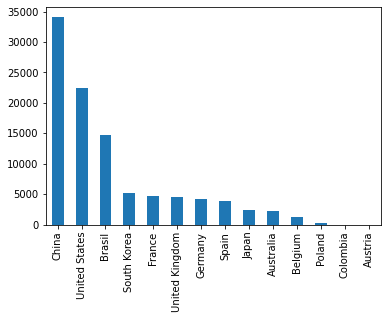

In [ ]:
# Multiple countries online transactions on inventory items
# Count the number of inventory items based on the category of inventory items sold by the look shop in each country
Negara = ecommerce['country'].value_counts().plot(kind='bar')

# Create a bar chart
Negara.plot(kind='bar', title='Transaction of the look store inventory items by country')

In the bar chart above, it will be seen that the majority of all inventory transactions are owned/performed by the Chinese government. The austin government conducts inventory transactions not very often.

[]

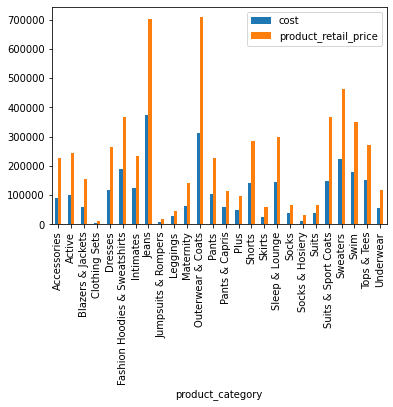

In [ ]:
# View a comparison of discounted prices and the selling price of inventory items in each category
# Count the number of inventory items by Category of inventory items then compare the discounted price with the original price
PerbandinganHarga = ecommerce.groupby('product_category').sum()[['cost','product_retail_price']].plot(kind='bar')

# Create a bar chart
PerbandinganHarga.plot(kind='bar', title='Comparison of the discounted price and the original price of Inventory Items')

In the bar chart above, it will be seen that the comparison of discounted prices and original prices can reduce the costs incurred by buyers in providing inventory items. Visually, Inventory Items in the jumpsuits & rompers category have a discounted price of half the original price, so they can save costs for buyers.

## 5b - Pie Chart

Pie graph or pie chart is a statistical graph in the form of a circle which is divided into several slices and its area depends on the numerical proportion or quantity of the data held. One circle indicates the whole or one hundred percent. In this milstone, it will display a pie chart in the form of sales of inventory items in each category.

In [ ]:
# Number of transactions for inventory items for each category
Pie = ecommerce.groupby(by='product_category')[['product_retail_price']].sum().sort_values(by='product_retail_price', ascending=True)
Pie.head()

,product_retail_price
product_category,
Clothing Sets,10285.380007
Jumpsuits & Rompers,18236.250028
Socks & Hosiery,32766.349930
Leggings,47308.359969
Skirts,59917.470161


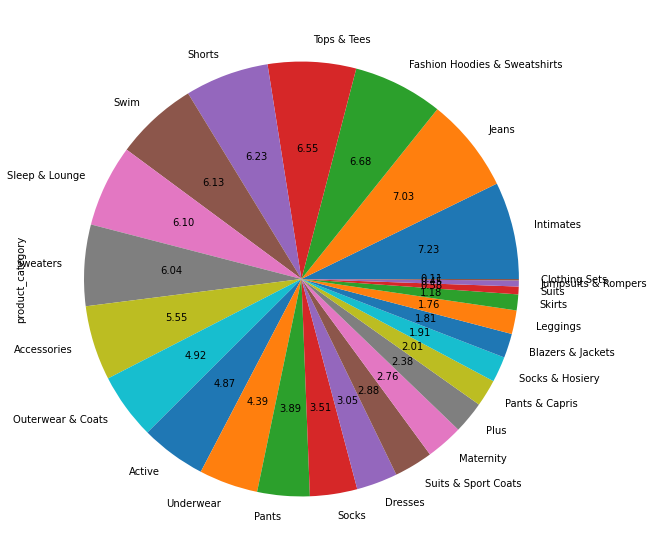

In [ ]:
# Displays the percentage of inventory sales transactions at the look shop
ecommerce['product_category'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')

Based on the pie chart above, it can be seen that the intimates category inventory items sold the most, followed by jeans and other categories.

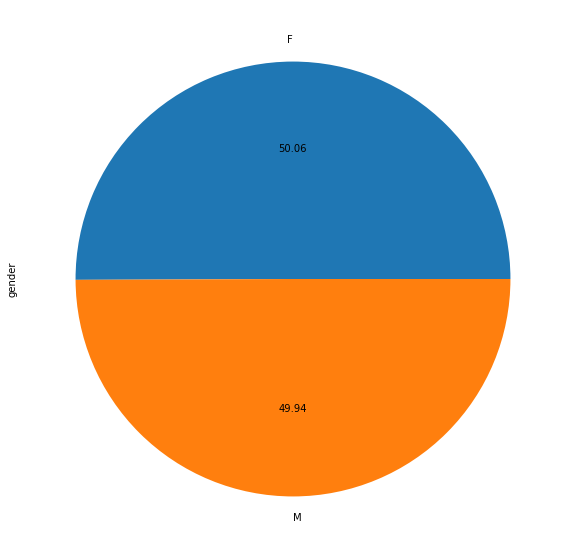

In [ ]:
# Displays the percentage of buyers' gender in making purchases of inventory items at the look shop
ecommerce['gender'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')

Based on the pie chart above, it can be seen that the male buyers of inventory items make the most transactions.

## 5c - Scatter plot

Scatter plot is a graph that is usually used to see a pattern of the relationship between 2 variables. To be able to use a scatter plot, the data scale used must be an interval and ratio scale. In this milstone, we want to see a scatter plot of the relationship between buyer age and the selling price of inventory items offered by the look shop.

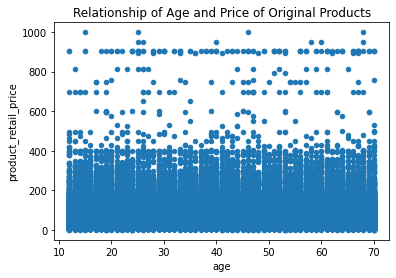

In [ ]:
#Scater Plot
ecommerce.plot(kind='scatter', title='Relationship of Age and Price of Original Products', x='age', y='product_retail_price')

Based on the scatter plot above, that there is a relationship between age and the price of inventory items sold. For example, Pants are often purchased by older people. Scatter plots can also show the existence of outliers that are far from the set of the two variables. Outliers are extreme data that may result from an abnormal situation.

# 6 - Statistical Analysis

Statistical analysis is a data processing process that includes checking, cleaning, transforming, processing, and modeling data. Statistical analysis is divided into two, namely descriptive statistics and inferential statistics.
- Statistics Description is a statistical method related to the way of collecting, processing and presenting data to provide information.
- Inferential statistics is a statistical method related to how to analyze, interpret and draw conclusions from the results of the analysis.
(Sudjana, 2002).


## 6a - Descriptive Statistics

Descriptive statistics are divided into 2, namely the size of the concentration and the size of the spread. In milstone, the measures of concentration used are the mean, median and mode. While the size of the spread used is the range, variance and standard deviation.

In [ ]:
# View the categories of products that are sold
TheLook['category'].unique()

array(['Swim', 'Jeans', 'Pants', 'Socks', 'Active', 'Shorts', 'Sweaters',
       'Underwear', 'Accessories', 'Tops & Tees', 'Sleep & Lounge',
       'Outerwear & Coats', 'Suits & Sport Coats',
       'Fashion Hoodies & Sweatshirts', 'Plus', 'Suits', 'Skirts',
       'Dresses', 'Leggings', 'Intimates', 'Maternity', 'Clothing Sets',
       'Pants & Capris', 'Socks & Hosiery', 'Blazers & Jackets',
       'Jumpsuits & Rompers'], dtype=object)

In [ ]:
# Central Tedency
Swim = TheLook.loc[TheLook['category']=='Swim', :]
print('---Product price category swim---')
print ('Mode: ' + str(Swim['retail_price'].mode()[0]))
print ('Median: ' + str(Swim['retail_price'].median()))
print ('Mean: ' + str(Swim['retail_price'].mean()))
print ('S.dev: ' + str(Swim['retail_price'].std()))
print(      )

Jeans = TheLook.loc[TheLook['category']=='Jeans', :]
print('---Product price category Jeans---')
print ('Mode: ' + str(Jeans['retail_price'].mode()[0]))
print ('Median: ' + str(Jeans['retail_price'].median()))
print ('Mean: ' + str(Jeans['retail_price'].mean()))
print ('S.dev: ' + str(Jeans['retail_price'].std()))
print(      )

Pants = TheLook.loc[TheLook['category']=='Pants', :]
print('---Product price category Pants---')
print ('Mode: ' + str(Pants['retail_price'].mode()[0]))
print ('Median: ' + str(Pants['retail_price'].median()))
print ('Mean: ' + str(Pants['retail_price'].mean()))
print ('S.dev: ' + str(Pants['retail_price'].std()))
print(      )

Socks = TheLook.loc[TheLook['category']=='Socks', :]
print('---Product price category Socks---')
print ('Mode: ' + str(Socks['retail_price'].mode()[0]))
print ('Median: ' + str(Socks['retail_price'].median()))
print ('Mean: ' + str(Socks['retail_price'].mean()))
print ('S.dev: ' + str(Socks['retail_price'].std()))
print(      )

Active = TheLook.loc[TheLook['category']=='Active', :]
print('---Product price category Active---')
print ('Mode: ' + str(Active['retail_price'].mode()[0]))
print ('Median: ' + str(Active['retail_price'].median()))
print ('Mean: ' + str(Active['retail_price'].mean()))
print ('S.dev: ' + str(Active['retail_price'].std()))
print(      )

Shorts = TheLook.loc[TheLook['category']=='Shorts', :]
print('---Product price category Shorts---')
print ('Mode: ' + str(Shorts['retail_price'].mode()[0]))
print ('Median: ' + str(Shorts['retail_price'].median()))
print ('Mean: ' + str(Shorts['retail_price'].mean()))
print ('S.dev: ' + str(Shorts['retail_price'].std()))
print(      )

Sweaters = TheLook.loc[TheLook['category']=='Sweaters', :]
print('---Product price category Sweaters---')
print ('Mode: ' + str(Sweaters['retail_price'].mode()[0]))
print ('Median: ' + str(Sweaters['retail_price'].median()))
print ('Mean: ' + str(Sweaters['retail_price'].mean()))
print ('S.dev: ' + str(Sweaters['retail_price'].std()))
print(      )

Underwear = TheLook.loc[TheLook['category']=='Underwear', :]
print('---Product price category Underwear---')
print ('Mode: ' + str(Underwear['retail_price'].mode()[0]))
print ('Median: ' + str(Underwear['retail_price'].median()))
print ('Mean: ' + str(Underwear['retail_price'].mean()))
print ('S.dev: ' + str(Underwear['retail_price'].std()))
print(      )

Accessories = TheLook.loc[TheLook['category']=='Accessories', :]
print('---Product price category Accessories---')
print ('Mode: ' + str(Accessories['retail_price'].mode()[0]))
print ('Median: ' + str(Accessories['retail_price'].median()))
print ('Mean: ' + str(Accessories['retail_price'].mean()))
print ('S.dev: ' + str(Accessories['retail_price'].std()))
print(      )

TopsTees = TheLook.loc[TheLook['category']=='Tops & Tees', :]
print('---Product price category TopsTees---')
print ('Mode: ' + str(TopsTees['retail_price'].mode()[0]))
print ('Median: ' + str(TopsTees['retail_price'].median()))
print ('Mean: ' + str(TopsTees['retail_price'].mean()))
print ('S.dev: ' + str(TopsTees['retail_price'].std()))
print(      )

SleepLounge = TheLook.loc[TheLook['category']=='Sleep & Lounge', :]
print('---Product price category SleepLounge---')
print ('Mode: ' + str(SleepLounge['retail_price'].mode()[0]))
print ('Median: ' + str(SleepLounge['retail_price'].median()))
print ('Mean: ' + str(SleepLounge['retail_price'].mean()))
print ('S.dev: ' + str(SleepLounge['retail_price'].std()))
print(      )

OuterwearCoats = TheLook.loc[TheLook['category']=='Outerwear & Coats', :]
print('---Product price category OuterwearCoats---')
print ('Mode: ' + str(OuterwearCoats['retail_price'].mode()[0]))
print ('Median: ' + str(OuterwearCoats['retail_price'].median()))
print ('Mean: ' + str(OuterwearCoats['retail_price'].mean()))
print ('S.dev: ' + str(OuterwearCoats['retail_price'].std()))
print(      )

SuitsSportCoats = TheLook.loc[TheLook['category']=='Suits & Sport Coats', :]
print('---Product price category SuitsSportCoats---')
print ('Mode: ' + str(SuitsSportCoats['retail_price'].mode()[0]))
print ('Median: ' + str(SuitsSportCoats['retail_price'].median()))
print ('Mean: ' + str(SuitsSportCoats['retail_price'].mean()))
print ('S.dev: ' + str(SuitsSportCoats['retail_price'].std()))
print(      )

FashionHoodiesSweatshirts = TheLook.loc[TheLook['category']=='Fashion Hoodies & Sweatshirts', :]
print('---Product price category FashionHoodiesSweatshirts---')
print ('Mode: ' + str(FashionHoodiesSweatshirts['retail_price'].mode()[0]))
print ('Median: ' + str(FashionHoodiesSweatshirts['retail_price'].median()))
print ('Mean: ' + str(FashionHoodiesSweatshirts['retail_price'].mean()))
print ('S.dev: ' + str(FashionHoodiesSweatshirts['retail_price'].std()))
print(      )

Plus = TheLook.loc[TheLook['category']=='Plus', :]
print('---Product price category Plus---')
print ('Mode: ' + str(Plus['retail_price'].mode()[0]))
print ('Median: ' + str(Plus['retail_price'].median()))
print ('Mean: ' + str(Plus['retail_price'].mean()))
print ('S.dev: ' + str(Plus['retail_price'].std()))
print(      )

Suits = TheLook.loc[TheLook['category']=='Suits', :]
print('---Product price category Suits---')
print ('Mode: ' + str(Suits['retail_price'].mode()[0]))
print ('Median: ' + str(Suits['retail_price'].median()))
print ('Mean: ' + str(Suits['retail_price'].mean()))
print ('S.dev: ' + str(Suits['retail_price'].std()))
print(      )

Skirts = TheLook.loc[TheLook['category']=='Skirts', :]
print('---Product price category Skirts---')
print ('Mode: ' + str(Skirts['retail_price'].mode()[0]))
print ('Median: ' + str(Skirts['retail_price'].median()))
print ('Mean: ' + str(Skirts['retail_price'].mean()))
print ('S.dev: ' + str(Skirts['retail_price'].std()))
print(      )

Dresses = TheLook.loc[TheLook['category']=='Dresses', :]
print('---Product price category Dresses---')
print ('Mode: ' + str(Dresses['retail_price'].mode()[0]))
print ('Median: ' + str(Dresses['retail_price'].median()))
print ('Mean: ' + str(Dresses['retail_price'].mean()))
print ('S.dev: ' + str(Dresses['retail_price'].std()))
print(      )

Leggings = TheLook.loc[TheLook['category']=='Leggings', :]
print('---Product price category Leggings---')
print ('Mode: ' + str(Leggings['retail_price'].mode()[0]))
print ('Median: ' + str(Leggings['retail_price'].median()))
print ('Mean: ' + str(Leggings['retail_price'].mean()))
print ('S.dev: ' + str(Leggings['retail_price'].std()))
print(      )

Intimates = TheLook.loc[TheLook['category']=='Intimates', :]
print('---Product price category Intimates---')
print ('Mode: ' + str(Intimates['retail_price'].mode()[0]))
print ('Median: ' + str(Intimates['retail_price'].median()))
print ('Mean: ' + str(Intimates['retail_price'].mean()))
print ('S.dev: ' + str(Intimates['retail_price'].std()))
print(      )

Maternity = TheLook.loc[TheLook['category']=='Maternity', :]
print('---Product price category Maternity---')
print ('Mode: ' + str(Maternity['retail_price'].mode()[0]))
print ('Median: ' + str(Maternity['retail_price'].median()))
print ('Mean: ' + str(Maternity['retail_price'].mean()))
print ('S.dev: ' + str(Maternity['retail_price'].std()))
print(      )

ClothingSets = TheLook.loc[TheLook['category']=='Clothing Sets', :]
print('---Product price category ClothingSets---')
print ('Mode: ' + str(ClothingSets['retail_price'].mode()[0]))
print ('Median: ' + str(ClothingSets['retail_price'].median()))
print ('Mean: ' + str(ClothingSets['retail_price'].mean()))
print ('S.dev: ' + str(ClothingSets['retail_price'].std()))
print(      )

PantsCapris = TheLook.loc[TheLook['category']=='Pants & Capris', :]
print('---Product price category PantsCapris---')
print ('Mode: ' + str(PantsCapris['retail_price'].mode()[0]))
print ('Median: ' + str(PantsCapris['retail_price'].median()))
print ('Mean: ' + str(PantsCapris['retail_price'].mean()))
print ('S.dev: ' + str(PantsCapris['retail_price'].std()))
print(      )

SocksHosiery = TheLook.loc[TheLook['category']=='Socks & Hosiery', :]
print('---Product price category SocksHosiery---')
print ('Mode: ' + str(SocksHosiery['retail_price'].mode()[0]))
print ('Median: ' + str(SocksHosiery['retail_price'].median()))
print ('Mean: ' + str(SocksHosiery['retail_price'].mean()))
print ('S.dev: ' + str(SocksHosiery['retail_price'].std()))
print(      )

BlazersJackets = TheLook.loc[TheLook['category']=='Blazers & Jackets', :]
print('---Product price category BlazersJackets---')
print ('Mode: ' + str(BlazersJackets['retail_price'].mode()[0]))
print ('Median: ' + str(BlazersJackets['retail_price'].median()))
print ('Mean: ' + str(BlazersJackets['retail_price'].mean()))
print ('S.dev: ' + str(BlazersJackets['retail_price'].std()))
print(      )

JumpsuitsRompers = TheLook.loc[TheLook['category']=='Jumpsuits & Rompers', :]
print('---Product price category JumpsuitsRompers---')
print ('Mode: ' + str(JumpsuitsRompers['retail_price'].mode()[0]))
print ('Median: ' + str(JumpsuitsRompers['retail_price'].median()))
print ('Mean: ' + str(JumpsuitsRompers['retail_price'].mean()))
print ('S.dev: ' + str(JumpsuitsRompers['retail_price'].std()))

---Product price category swim---
Mode: 25.0
Median: 49.9900016784668
Mean: 57.81566191833462
S.dev: 35.78527989865552

---Product price category Jeans---
Mode: 98.0
Median: 78.0
Mean: 97.85320674568013
S.dev: 63.84652302631376

---Product price category Pants---
Mode: 49.9900016784668
Median: 49.9900016784668
Mean: 59.81431338285507
S.dev: 38.333552884302804

---Product price category Socks---
Mode: 12.0
Median: 15.079999923706056
Mean: 20.424928183581947
S.dev: 43.04001379738287

---Product price category Active---
Mode: 25.0
Median: 33.97999954223633
Mean: 50.62101957834633
S.dev: 75.69040993678708

---Product price category Shorts---
Mode: 25.0
Median: 39.59999847412109
Mean: 45.769915145247246
S.dev: 46.230400373773534

---Product price category Sweaters---
Mode: 19.989999771118164
Median: 58.9900016784668
Mean: 75.31898100319853
S.dev: 58.82624227057094

---Product price category Underwear---
Mode: 25.0
Median: 25.0
Mean: 27.156001869808225
S.dev: 14.994457996924245

---Product p

Based on the value of centarl tendency, that the underware product category has the most standard deviation value because it will use the data to find the value of the size of the spreader without outlier data, then first look at the shape of the distribution.

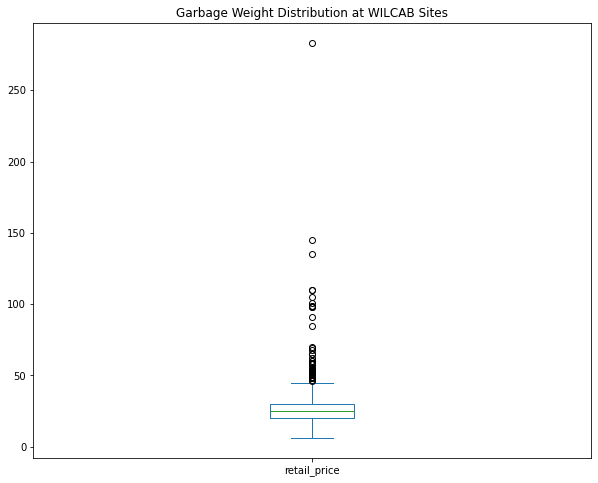

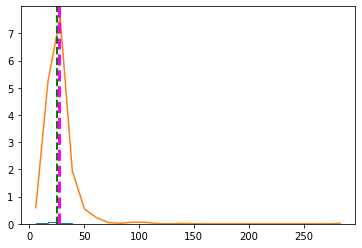

retail_price skewness: 6.681155435060603
retail_price kurtosis: 88.0401882528836


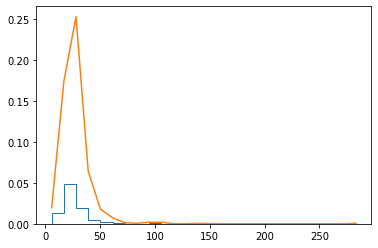

In [ ]:
# UNDERWEAR PRODUCT CATEGORY DISTRIBUTION

# Visualization of Box Plot of Grade

%matplotlib inline
import scipy.stats as stats

# Plot a box-whisker chart
Underwear['retail_price'].plot(kind='box', title='Garbage Weight Distribution at WILCAB Sites', figsize=(10,8))
plt.show()

# Visualization of Distribution
Distribusi = Underwear['retail_price']
density = stats.gaussian_kde(Distribusi)
n, x, _ = plt.hist(Distribusi, histtype='step', bins=25, density = True)  
plt.plot(x, density(x)*2**7.5)
plt.axvline(Distribusi.mean(), color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(Distribusi.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

# Get Skewness and Kurtosis Score
kemiringan = ['retail_price']
for col in kemiringan:
    print(Underwear[col].name + ' skewness: ' + str(Underwear[col].skew()))
    print(Underwear[col].name + ' kurtosis: ' + str(Underwear[col].kurt()))
    n, x, _ = plt.hist(Underwear[col], histtype='step', bins=25, density = True)
    plt.plot(x, density(x)*6)
    plt.show()
    print('\n')

Outlier Value Detection

The method to check the oulier value can use Tukey with a 5-digit summary to detect outliers. The bottom line is that data that deviates from the median above a certain threshold will be marked as outliers. The formula for Tukey's outlier detection

${q_{3}+1.5*IQR}$

${q_{1}-1.5*IQR}$

In [ ]:
Q1 = Underwear['retail_price'].quantile(0.25)
Q3 = Underwear['retail_price'].quantile(0.75)
IQR = Q3-Q1
Underwear2 = Underwear[~(((Underwear['retail_price'] < (Q1-1.5*IQR)) | (Underwear['retail_price'] > (Q3+1.5*IQR))))]

In [ ]:
Q1 = Underwear2['retail_price'].quantile(0.25)
Q3 = Underwear2['retail_price'].quantile(0.75)
IQR = Q3-Q1
Underwear3 = Underwear2[~(((Underwear2['retail_price'] < (Q1-1.5*IQR)) | (Underwear2['retail_price'] > (Q3+1.5*IQR))))]

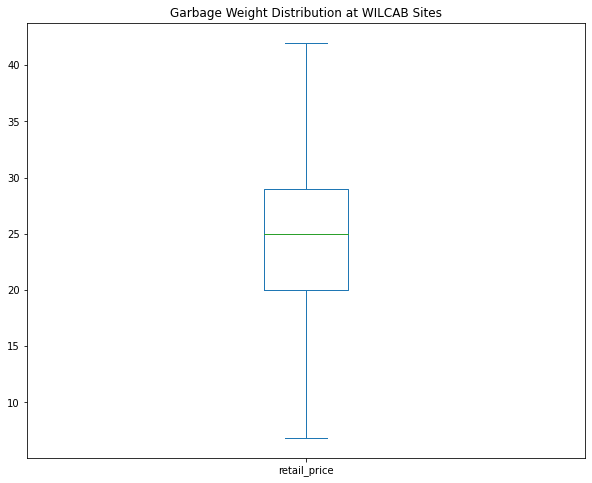

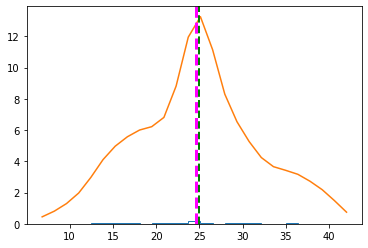

retail_price skewness: 0.12248682274161883
retail_price kurtosis: -0.14190799945954602


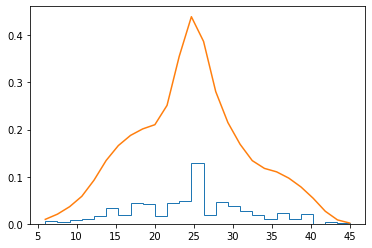

In [ ]:
# VISUALIZATION OF UNDERWEAR CATEGORY PRODUCTS WITHOUT OUTLIER

# Visualization of Box Plot of Grade

%matplotlib inline
import scipy.stats as stats

# Plot a box-whisker chart
Underwear3['retail_price'].plot(kind='box', title='Garbage Weight Distribution at WILCAB Sites', figsize=(10,8))
plt.show()

# Visualization of Distribution
DistribusUnderwear3 = Underwear3['retail_price']
density = stats.gaussian_kde(DistribusUnderwear3)
n, x, _ = plt.hist(DistribusUnderwear3, histtype='step', bins=25, density = True)  
plt.plot(x, density(x)*2**7.5)
plt.axvline(DistribusUnderwear3.mean(), color='magenta', linestyle='dashed', linewidth=3)
plt.axvline(DistribusUnderwear3.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

# Get Skewness and Kurtosis Score
kemiringan = ['retail_price']
for col in kemiringan:
    print(Underwear3[col].name + ' skewness: ' + str(Underwear2[col].skew()))
    print(Underwear3[col].name + ' kurtosis: ' + str(Underwear2[col].kurt()))
    n, x, _ = plt.hist(Underwear2[col], histtype='step', bins=25, density = True)
    plt.plot(x, density(x)*6)
    plt.show()
    print('\n')

Comparison of underware product categories before the data is cleaned from outliers with after the data is cleaned from ouliers.

In [ ]:
print('---Product price category Underwear---')
print ('Min: ' + str(Underwear['retail_price'].min()))
print ('Max: ' + str(Underwear['retail_price'].max()))
print ('Mode: ' + str(Underwear['retail_price'].mode()[0]))
print ('Median: ' + str(Underwear['retail_price'].median()))
print ('Mean: ' + str(Underwear['retail_price'].mean()))
print ('S.dev: ' + str(Underwear['retail_price'].std()))
print(      )
print('---Product price category Underwear without outlier data---')
print ('Min: ' + str(Underwear3['retail_price'].min()))
print ('Max: ' + str(Underwear3['retail_price'].max()))
print ('Mode: ' + str(Underwear3['retail_price'].mode()[0]))
print ('Median: ' + str(Underwear3['retail_price'].median()))
print ('Mean: ' + str(Underwear3['retail_price'].mean()))
print ('S.dev: ' + str(Underwear3['retail_price'].std()))

---Product price category Underwear---
Min: 5.989999771118164
Max: 283.3399963378906
Mode: 25.0
Median: 25.0
Mean: 27.156001869808225
S.dev: 14.994457996924245

---Product price category Underwear without outlier data---
Min: 6.829999923706056
Max: 42.0
Mode: 25.0
Median: 25.0
Mean: 24.580895701261955
S.dev: 7.08802163478223


**Range**, a simple way to measure variance in a data set is to identify the difference between the lowest and highest values. This is called the range, and is calculated by subtracting the minimum value from the maximum value.

In [ ]:
# Range

Range = ['retail_price']
for col in Range:
    print(Underwear3[col].name + ' range: ' + str(Underwear3[col].max() -Underwear3[col].min()))

retail_price range: 35.170000076293945


**Variance**, how to show how far the data that is owned is spread from the average value. Meanwhile, **standard deviation** is a way to find out how much the value or amount of data differs from the average.

In [ ]:
# Get the Variance
print(f'Value variance :', Underwear3['retail_price'].var())
# Get the Standard Deviation
print(f'Value standard deviation :', Underwear3['retail_price'].std())

Value variance : 50.24005069514096
Value standard deviation : 7.08802163478223


## 6b - Inferential Statistics

In this milestone, one sample t-test one tailed and Independent two test analysis will be used

### Inferential Statistics - One Sample T-Test One Tailed

one sample t-test one tailed, is used to see whether or not there is a significant increase in an object.

In [ ]:
TheLook['SaleOrderan'] = TheLook['sale_price']# income data variable contains quantity control data on unit price items
TheLook['date'] = TheLook['created_at']# data variable containing the year of production
discount = TheLook[['date','SaleOrderan']].groupby('date').sum() # see daily_income from the quantity control data at the time

In [ ]:
TheLook['sale_price'].mode()

0    25.0
dtype: float64

In [ ]:
print('Price sale_price Sales : ${}'.format(np.round(discount['SaleOrderan'].mean()))) # view average

Price sale_price Sales : $59.0


To check whether the discounted price to the shop's customers increases significantly or not, we will conduct a one-sided single sample and set a significance level of 0.05. We use this method because we only test the variables and compare the sample (the most frequently used discounted price data is $25) and the population (we assume it is discounted price data of the last few days).

Hypothesis

**H0: μ <= \$59** (There has been a significant discount on product prices at the look shop)

**H1: μ > \$59** (There is a significant discount on product prices at the look shop)

In [ ]:
# wanted to see if 59 dollars was significant
# stats.ttest_1samp syntax for one sample t-test
# Comparing the cut price with 25 as a benchmark, which often happens with discount prices
t_stat,p_val = stats.ttest_1samp(discount.SaleOrderan,25)
print('P-value:',p_val/2) # The p-value is divided by 2 because the output is a two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.0
t-statistics: 88.07460807419362


The result of 0.0 is less than 0.05 so hereby rejects h0. which means that there is a significant difference in some discounted prices on products recently at the look store.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


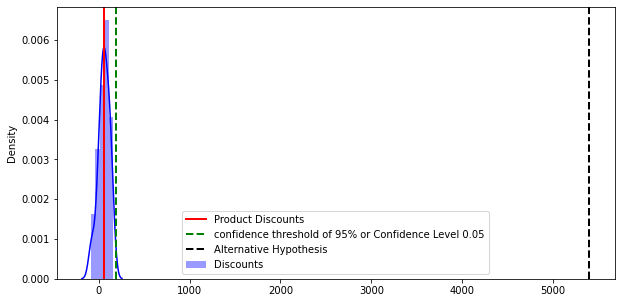

In [ ]:
# Visualization distribusi one sampel t-test
Product_Discounts = np.random.normal(discount.SaleOrderan.mean(), discount.SaleOrderan.std(), 25)

ci = stats.norm.interval(0.95, discount.SaleOrderan.mean(), discount.SaleOrderan.std())

plt.figure(figsize=(10,5))
sns.distplot(Product_Discounts, label='Discounts', color='blue')
plt.axvline(discount.SaleOrderan.mean(), color='red', linewidth=2, label='Product Discounts')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95% or Confidence Level 0.05')
plt.axvline(Product_Discounts.mean() + t_stat*Product_Discounts.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

### Inferential Statistics - Independent Sample T-Test

Independent sample t-test is a test used to determine whether there is a difference in the mean between two independent groups or two unpaired groups with the intention that the two groups of data come from different subjects. So I will test the difference between the average price of Underware products and the prices of Socks & Hosiery products.

In [ ]:
# Seeing the average
PriceUnderwear = TheLook[TheLook.category == 'Underwear'].groupby('created_at').sum()['retail_price'] 
PriceSocksHosiery = TheLook[TheLook.category == 'Socks & Hosiery'].groupby('created_at').sum()['retail_price']

print("Average Underwear Price : ",PriceUnderwear.mean())
print("Average Socks & Hosiery Price : ",PriceSocksHosiery.mean())

Average Underwear Price :  27.156001869808225
Average Socks & Hosiery Price :  16.759954925771947


The Average Price of Underware is 27 and the Average Price of Socks & Hosiery is worth 16, are there both prices for these products?

Hypothesis

**H0: μ_ Underware(27) = μ_Socks & Hosiery(16)** (The average difference in the price of underware products is the same as sorks & hosiery)

**H1: μ_ Underware(27) = μ_Socks & Hosiery(16)** (The difference in the average price of underware products is not the same as sorks & hosiery)

In [ ]:
# If independent use stats.ttest_ind
t_stat, p_val = stats.ttest_ind(PriceUnderwear,PriceSocksHosiery)
print('P-value:',p_val) 
print('t-statistics:',t_stat)

P-value: 2.207027843691716e-50
t-statistics: 15.416477251058861


The p-value is 0.00000 < (smaller) than the significance level is 0.05, so it rejects the hypothesis H0. So that Hypothesis H1 is accepted, the average difference in the price of underware products is not the same as sorks & hosiery.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


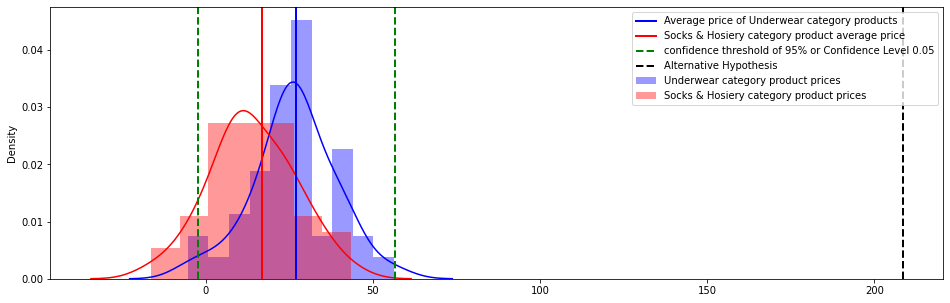

In [ ]:
productunderwear = np.random.normal(PriceUnderwear.mean(),PriceUnderwear.std(),43)
productsockshosiery = np.random.normal(PriceSocksHosiery.mean(),PriceSocksHosiery.std(),43)

ci = stats.norm.interval(0.95, PriceUnderwear.mean(), PriceUnderwear.std())
plt.figure(figsize=(16,5))
sns.distplot(productunderwear, label='Underwear category product prices',color='blue')
sns.distplot(productsockshosiery, label='Socks & Hosiery category product prices',color='red')

plt.axvline(PriceUnderwear.mean(), color='blue', linewidth=2, label='Average price of Underwear category products')
plt.axvline(PriceSocksHosiery.mean(), color='red',  linewidth=2, label='Socks & Hosiery category product average price')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95% or Confidence Level 0.05')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)
plt.axvline(productsockshosiery.mean() + t_stat*productsockshosiery.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')

plt.legend()

# 7 - Conclusion From Problem Identification

> a. Which country has the largest average inventory purchase transaction?

Answer: Based on the results of the data visualization in the bar chart above, it will be seen that the majority of transactions for all inventory items are owned/performed by the Chinese government. Indicates that the Chinese government often purchases inventory for all purposes in supporting its country's system. The second place is the unitet states, then the third is Brazil. The austin government conducts inventory transactions not too often or at least compared to other countries in purchasing goods for the purpose of supporting its country's system. Based on this the CEO of The Look store can see if there are any inventory sales, which is odd from the number of sales against the income received.


> b. How does the cost of capital compare with the selling price of inventory items?

Answer: Based on the visualization results in the bar chart above, it can be seen that the comparison of discounted prices and original prices can reduce the costs incurred by buyers in providing inventory items. Visually, Inventory Items in the jumpsuits & rompers category have a discounted price of half the original price, so they can save costs for buyers. This visualization can be a reference for buyers if they want to buy which inventory items have the highest discounted prices so they don't lose, so that buyers' expenses can be controlled more efficiently. Based on this, the CEO of the look shop can pay attention to the discounted prices that are in demand by their customers, so that they can be increased to get good profits.

> c. What is the number of comparisons of sales of inventory items in each category of goods?

Answer: Based on the pie chart visualization above, it can be seen that the intimates category of inventory items sold the most, followed by the Fashion Hoodies & Sweatshirts, Tops & Tees, Shorts, Swim, Sleep & Lounge and Sweaters categories as inventory items with almost the total sold the same and continued with other categories of inventory items. This visualization can be a reference for buyers, to see what stock or types of goods are available at the look shop. Based on this, the CEO of the look store can see which buyer's interest in the category of inventory items, if there is a category of goods with high interest can be checked whether there are sales that come out according to the income received

> d. Is the price of an inventory item determined by the age of the customer?

Answer: Based on the results of the scatter plot visualization above, that there is a relationship between age and the price of inventory items sold. For example, Pants are often purchased by older people. Scatter plots can also show the existence of outliers that are far from the set of the two variables. Outliers are extreme data that may result from an abnormal situation. Based on this, the CEO of the look store can see the interest in the price of goods that are often purchased by several groups based on age. If shoppers in their 40s most often buy items for around $60 or more, it can be a good idea to sell for age-appropriate customers.

> e. Based on the size of the spread, what are the values ​​of the range, variance and standard deviation of the selected product category without any outlier data?

Answer: Based on the calculation of the range for the underware product category, the difference between the highest and lowest selling prices is 35 dollars, indicating that the price range for the underware product category is in the look shop. The variance is a calculation to show how far the data in possession is spread from the average value, so the price of the underwear category product at the look store is the most expensive among the general prices of 40, which usually costs around 25 dollars. While the standard deviation is to find out how many values ​​or amounts of data are different from the average, then the price of the most expensive underwaer category product at the look store at 40 dollars has happened 7 times during the transaction time span of sales at the look store. Based on this, the look's CEO, can evaluate product prices in several categories other than underwear products, to control prices that are too high so as not to make a loss for the look store.

> f. Has the product discount at the look store increased significantly?

Answer: Based on the One sample one tailed test, it was found that there was a significant change regarding price discounts on products sold by the look shop. Based on this, CEO of the look can maintain the price of the product cut so that more customers will be interested in making transactions.

> g. How is the average difference in product sales for the underwear category with sochs & hosiery?

Answer: Based on the results of the independent t-test, it shows that there is a difference in the average price of the under category product